In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances


np.set_printoptions(suppress=True)  # This is used to Avoid the numbers in exponents form
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
customers = pd.read_csv('customers.csv')
sales = pd.read_csv('sales_data.csv')
orders = pd.read_csv('orders1.csv')

In [3]:
print(customers.head())
print(sales.head())
print(orders.head())

   customer_id  total_spend  num_orders last_order_date
0         1001  8072.510788          14      2023-05-28
1         1002  4295.331083          39      2023-09-06
2         1003  9527.625896          10      2023-05-10
3         1004  4760.739090          46      2023-03-06
4         1005  6070.383831          45      2023-06-24
   order_id product_name category  order_date     revenue   region
0         1      Chicken     Meat  2023-12-05  443.177076     West
1         2         Eggs    Dairy  2023-09-30  263.980108  Central
2         3   Vegetables     Meat  2023-03-03   57.065403    South
3         4       Fruits    Dairy  2023-02-01  137.527289     East
4         5         Eggs   Bakery  2023-07-20  290.176776    South
   order_id  customer_id  order_date           city  total_amount
0         1         1102  2023-10-19        Houston     95.433959
1         2         1045  2023-03-10        Chicago    380.831884
2         3         1301  2023-09-26        Houston    126.69165

In [4]:
data = pd.merge(sales, orders, on='order_id', how='inner')

In [5]:
data = pd.merge(data, customers, on='customer_id', how='inner')

In [6]:
data

,order_id,product_name,category,order_date_x,revenue,region,customer_id,order_date_y,city,total_amount,total_spend,num_orders,last_order_date
0,1,Chicken,Meat,2023-12-05,443.177076,West,1102,2023-10-19,Houston,95.433959,4884.836297,4,2023-05-07
1,2,Eggs,Dairy,2023-09-30,263.980108,Central,1045,2023-03-10,Chicago,380.831884,3451.761006,47,2023-03-12
2,3,Vegetables,Meat,2023-03-03,57.065403,South,1301,2023-09-26,Houston,126.691659,4413.350242,39,2023-10-24
3,4,Fruits,Dairy,2023-02-01,137.527289,East,1252,2023-03-06,Chicago,324.203999,9496.682794,13,2023-08-29
4,5,Eggs,Bakery,2023-07-20,290.176776,South,1443,2023-08-01,San Francisco,392.898011,1451.350602,28,2023-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Fruits,Bakery,2023-12-16,430.325756,South,1838,2023-06-25,Houston,451.033965,3942.260477,12,2023-12-24
4996,4997,Chicken,Bakery,2023-12-01,436.328980,West,1668,2023-04-22,Chicago,133.156218,1930.616422,13,2023-07-03
4997,4998,Milk,Meat,2023-10-29,227.834215,West,1193,2023-01-13,Chicago,296.847061,3403.526122,29,2023-08-20
4998,4999,Rice,Dairy,2023-08-23,261.236822,Central,1315,2023-05-11,San Francisco,153.847593,5021.117054,1,2023-09-08


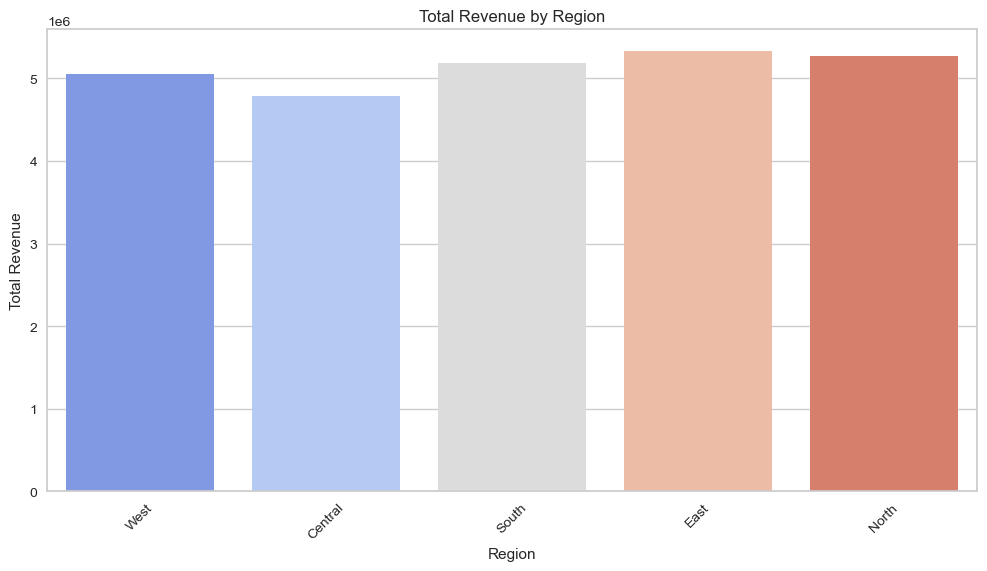

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data['region'], y=data['total_spend'], estimator=sum, ci=None, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.show()


In [9]:
customer_summary = data.groupby('customer_id').agg({
    'total_spend': ['sum'],  
    'num_orders': ['sum'],   
    'last_order_date': ['min', 'max']  
})

customer_summary.columns = ['total_spent', 'total_orders', 'first_order', 'last_order']

customer_summary['last_order'] = pd.to_datetime(customer_summary['last_order'])

customer_summary['recency'] = (pd.to_datetime('today') - customer_summary['last_order']).dt.days

customer_summary.drop(columns=['first_order', 'last_order'], inplace=True)

print(customer_summary.head())

              total_spent  total_orders  recency
customer_id                                     
1001         32290.043151            56      631
1002          8590.662165            78      530
1003         28582.877688            30      649
1004          4760.739090            46      714
1005         42492.686816           315      604


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary)


In [11]:
k_elbow = KElbowVisualizer(KMeans(),k=10)

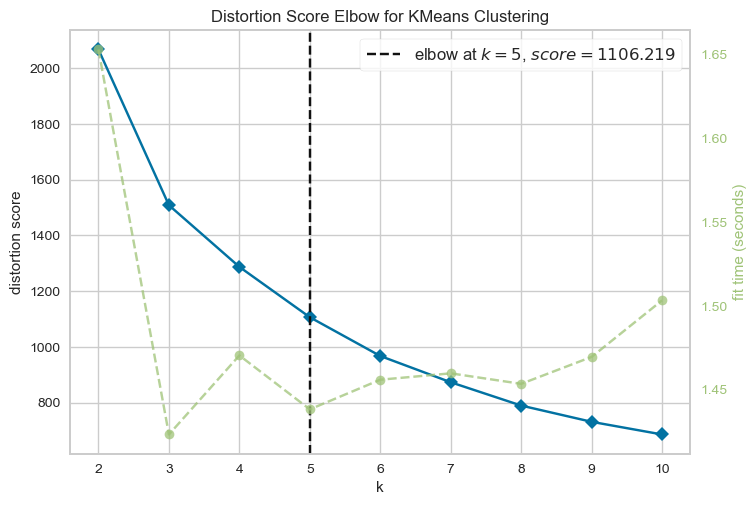

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
k_elbow.fit(scaled_data)
k_elbow.show()

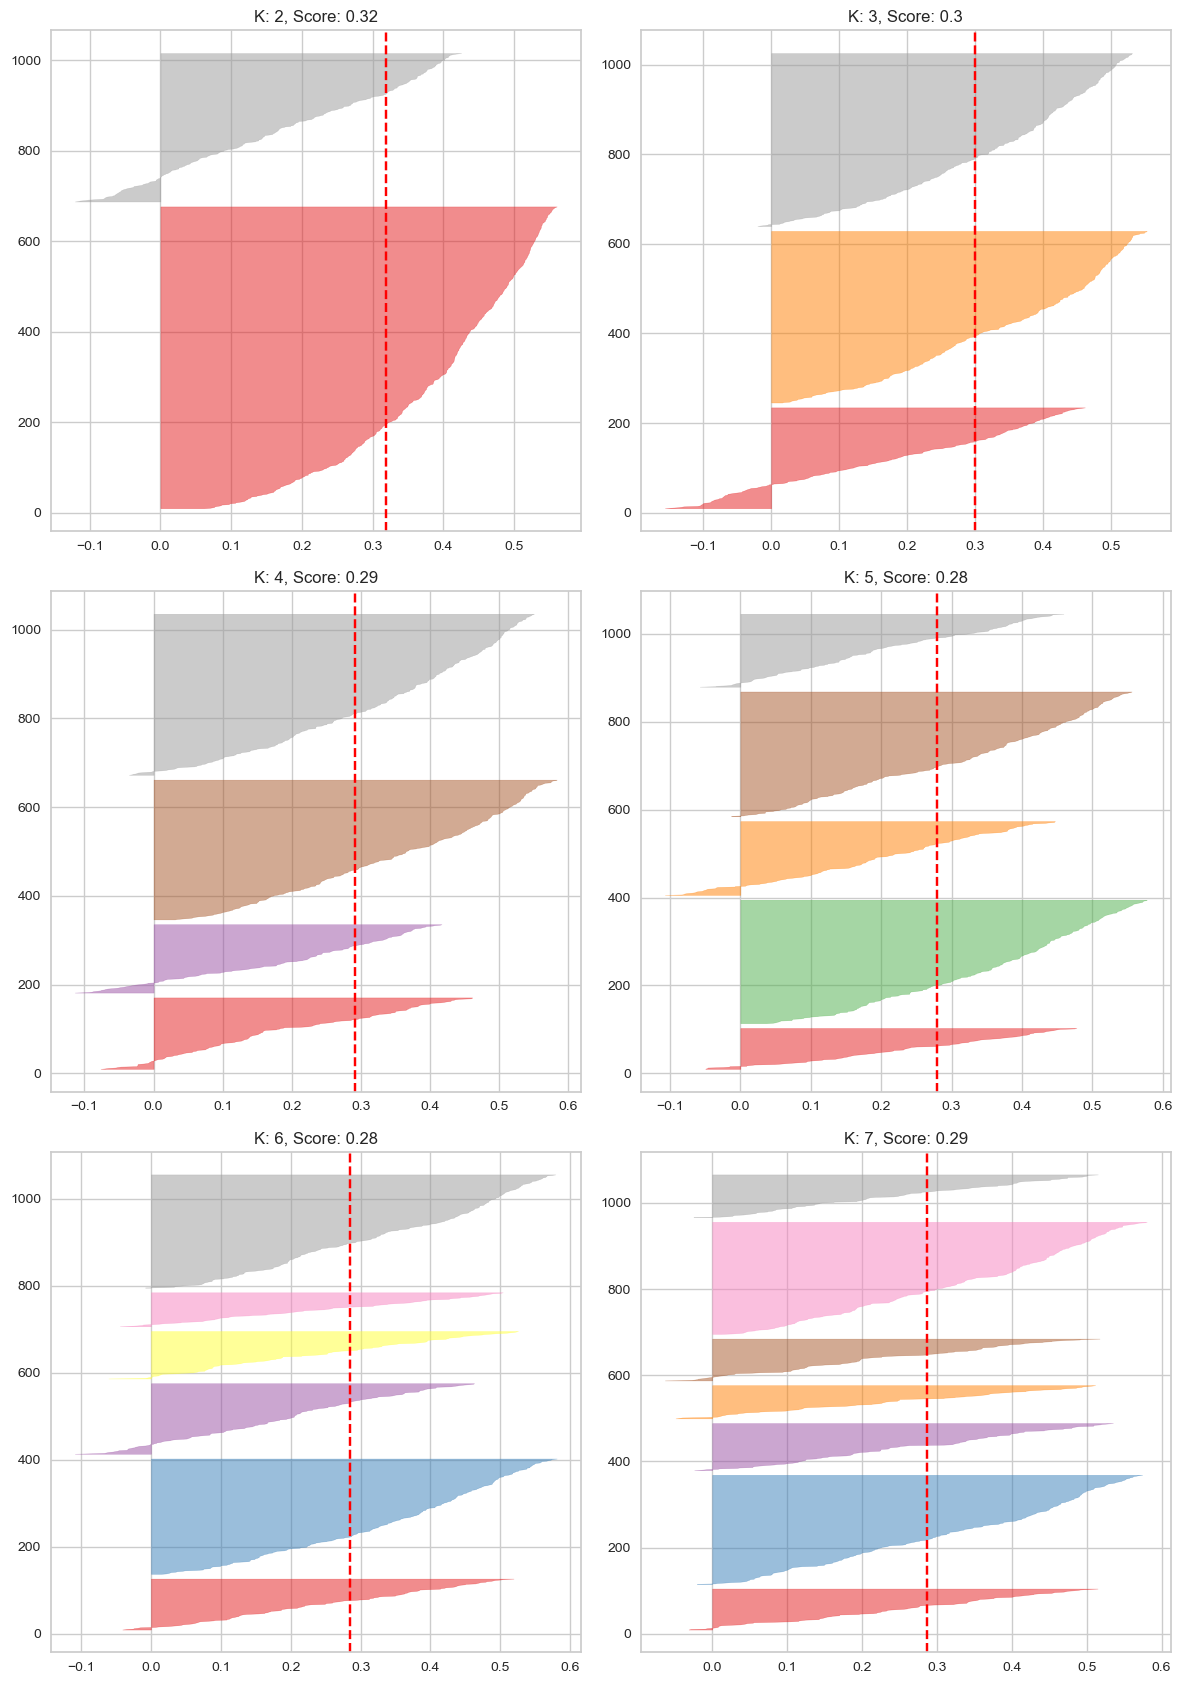

In [13]:
t=1
plt.figure(figsize=(12,17))
for i in range(2,8):
    plt.subplot(3,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(scaled_data)
    # plt.title('K: %d, Score: %.2f'%(i,sil_viz.silhouette_score_))
    plt.title(f'K: {i}, Score: {np.round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
customer_summary['segment'] = kmeans.fit_predict(scaled_data)


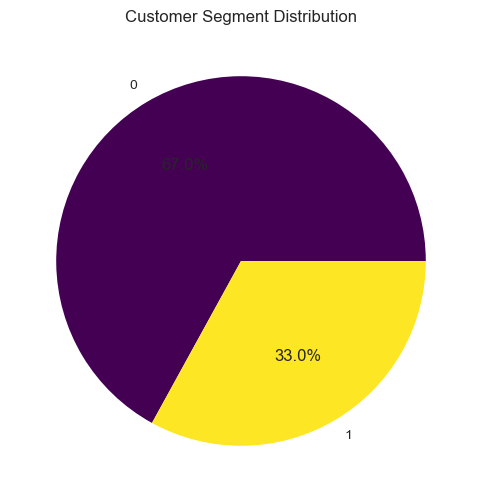

In [15]:
plt.figure(figsize=(8, 6))
customer_summary['segment'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis')
plt.title('Customer Segment Distribution')
plt.ylabel('')
plt.show()


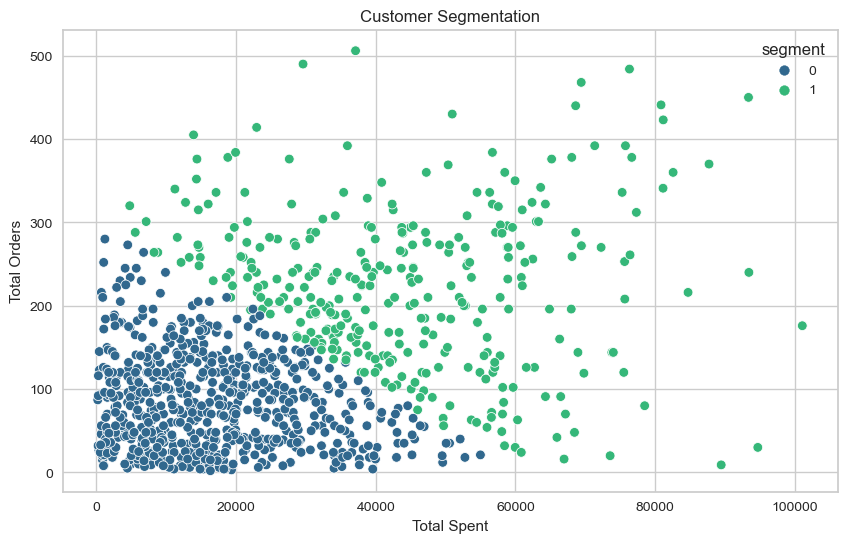

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_summary['total_spent'], y=customer_summary['total_orders'], hue=customer_summary['segment'], palette='viridis')
plt.xlabel('Total Spent')
plt.ylabel('Total Orders')
plt.title('Customer Segmentation')
plt.show()

  order_date_x order_date_y last_order_date
0   2023-12-05   2023-10-19      2023-05-07
1   2023-09-30   2023-03-10      2023-03-12
2   2023-03-03   2023-09-26      2023-10-24
3   2023-02-01   2023-03-06      2023-08-29
4   2023-07-20   2023-08-01      2023-05-15


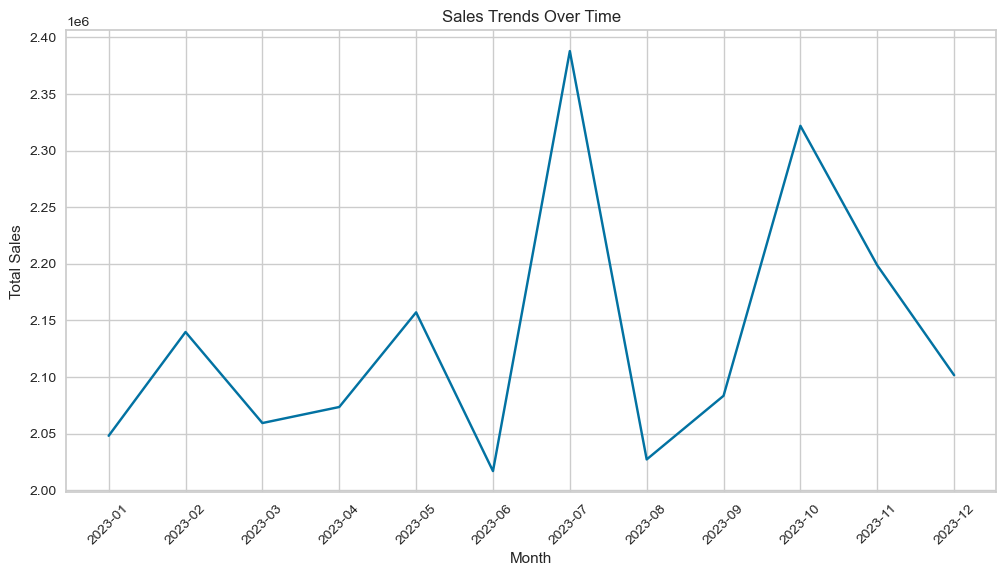

In [17]:
print(data[['order_date_x', 'order_date_y', 'last_order_date']].head())

data['order_date_x'] = pd.to_datetime(data['order_date_x'])

data['month'] = data['order_date_x'].dt.to_period('M')

monthly_sales = data.groupby('month').agg({'total_spend': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['month'].astype(str), y=monthly_sales['total_spend'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.show()

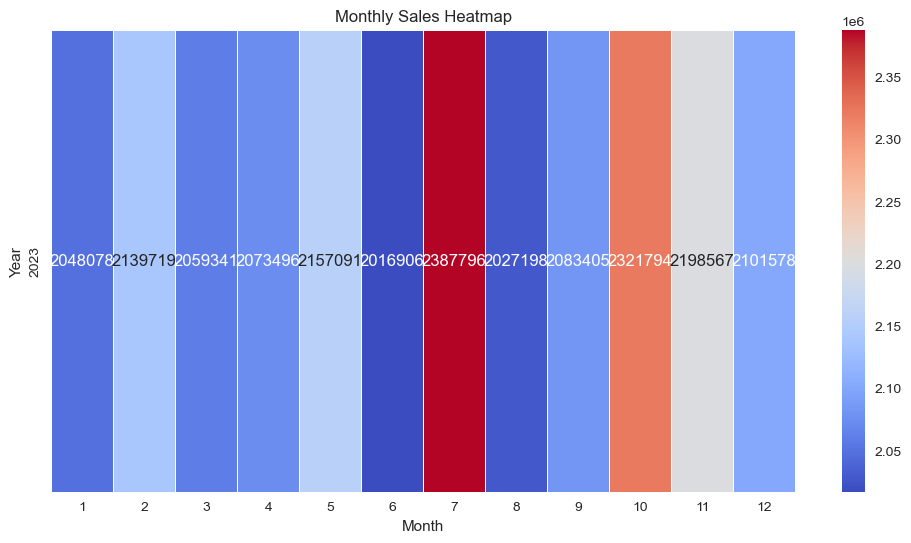

In [18]:
data['year'] = data['order_date_x'].dt.year
data['month_num'] = data['order_date_x'].dt.month
monthly_heatmap = data.pivot_table(index='year', columns='month_num', values='total_spend', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_heatmap, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Sales Heatmap')
plt.show()

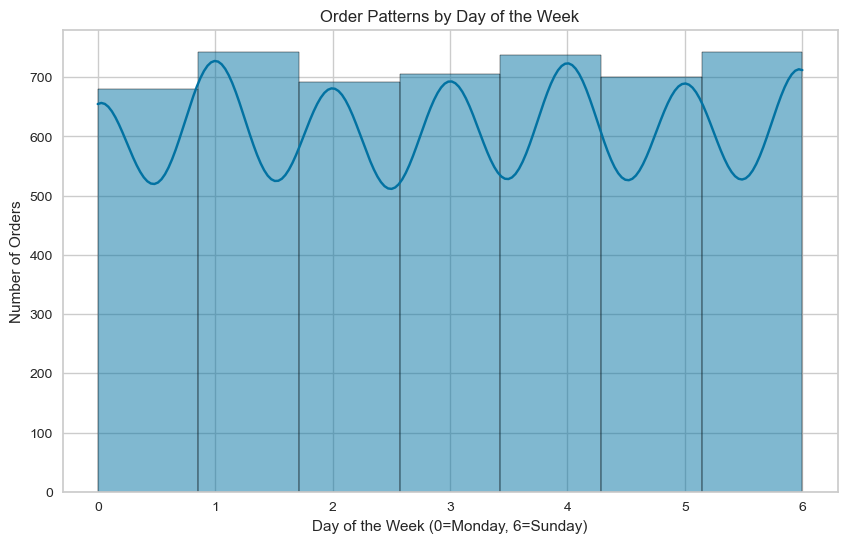

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['order_date_x'].dt.dayofweek, bins=7, kde=True)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Orders')
plt.title('Order Patterns by Day of the Week')
plt.show()